In [3]:
import csv
import pandas as pd
import datetime 
import time

import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os

import xgboost as xgb
import networkx as nx
import pdb
from pandas import HDFStore, DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

after_eda = 'data/after_eda'
fea_sample = 'data/fea_sample'

In [4]:
df_final_train = read_hdf(f'{fea_sample}/storage_sample_stage5.h5', 'train_df', mode='r')
df_final_test = read_hdf(f'{fea_sample}/storage_sample_stage5.h5', 'test_df', mode='r')

In [5]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_followers', 'preferential_followees', 'svd_dot'],
      dtype='object')

In [6]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [7]:
df_final_train.drop(['source_node', 'destination_node', 'indicator_link'], axis=1, inplace=True)
df_final_test.drop(['source_node', 'destination_node', 'indicator_link'], axis=1, inplace=True)

## Chossing hyperparameter

In [8]:
n_estimator = [10,50,100,250,450]
n_max_depth = [3,9,11,15,20]
n_learning_rate = [0.0001, 0.01, 0.1, 1, 10]

## Training model with each hyperparamter

Estimator = 10 Train Score = 0.9252532936092887 Test score = 0.9252532936092887
Estimator = 50 Train Score = 0.9655635062611807 Test score = 0.9655740204299437
Estimator = 100 Train Score = 0.974554063761547 Test score = 0.974554063761547
Estimator = 250 Train Score = 0.9788887319111147 Test score = 0.9788784273359369
Estimator = 450 Train Score = 0.9834907795853078 Test score = 0.9834805529286303


Text(0.5,1,'Estimator vs Train and Test score at Depth: 3 and Learning rate : 0.1')

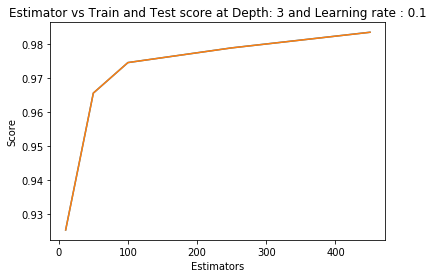

In [9]:
#Tuning with estimator as a hyperparameter
train_scores = []
test_scores = []

for i in n_estimator:
    clf = xgb.XGBClassifier(n_estimators=i, max_depth=3, learning_rate=0.1)
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    
    print('Estimator =', i, 'Train Score =', train_sc, 'Test score =', test_sc)

plt.plot(n_estimator, train_scores, label = 'Train score')
plt.plot(n_estimator, test_scores, label = 'Test score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimator vs Train and Test score at Depth: 3 and Learning rate : 0.1')

Depth = 3 Train Score = 0.974554063761547 Test score = 0.974554063761547
Depth = 9 Train Score = 0.9880927260121184 Test score = 0.9880825579292188
Depth = 11 Train Score = 0.9926868172105575 Test score = 0.9926767119439819
Depth = 15 Train Score = 0.9995703909442407 Test score = 0.9995603956439204
Depth = 20 Train Score = 0.9999900128833804 Test score = 0.9999700380516745


Text(0.5,1,'Depth vs Train and Test score at Estimator: 100 and Learning rate : 0.1')

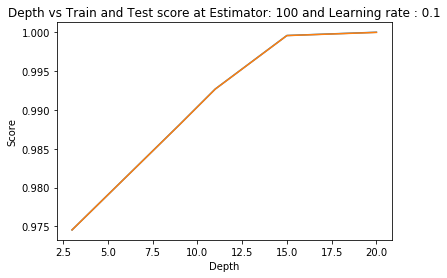

In [10]:
#Tuning with depth as a hyperparameter
train_scores = []
test_scores = []

for i in n_max_depth:
    clf = xgb.XGBClassifier(n_estimators=100, max_depth=i, learning_rate=0.1)
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    
    print('Depth =', i, 'Train Score =', train_sc, 'Test score =', test_sc)

plt.plot(n_max_depth, train_scores, label = 'Train score')
plt.plot(n_max_depth, test_scores, label = 'Test score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs Train and Test score at Estimator: 100 and Learning rate : 0.1')

Learning rate = 0.0001 Train Score = 0.8943094388714413 Test score = 0.8943094388714413
Learning rate = 0.01 Train Score = 0.9276772709041398 Test score = 0.9276772709041398
Learning rate = 0.1 Train Score = 0.974554063761547 Test score = 0.974554063761547
Learning rate = 1 Train Score = 0.9911849754359985 Test score = 0.9911849754359985
Learning rate = 10 Train Score = 0.0 Test score = 0.0


Text(0.5,1,'Learning rate vs Train and Test score at Estimator: 100 and Depth : 3')

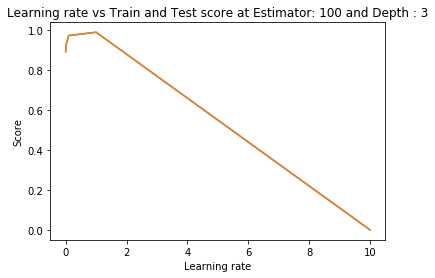

In [12]:
#Tuning with learning rate as a hyperparameter
train_scores = []
test_scores = []

for i in n_learning_rate:
    clf = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=i)
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    
    print('Learning rate =', i, 'Train Score =', train_sc, 'Test score =', test_sc)

plt.plot(n_learning_rate, train_scores, label = 'Train score')
plt.plot(n_learning_rate, test_scores, label = 'Test score')
plt.xlabel('Learning rate')
plt.ylabel('Score')
plt.title('Learning rate vs Train and Test score at Estimator: 100 and Depth : 3')

As per the above observations, we can see that estimator around 50 and 100, depth around 9 and 11, learning rate of 0.1 are performing very well.

## Performing random search cv on some of the hyperparamters

In [13]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"learning_rate"    : [0.1] ,
              "max_depth"        : [9, 11],
              "n_estimator"      : [80, 100, 120],
              "min_child_weight" : [3, 5, 7 ],
              "gamma"            : [0.0, 0.1, 0.2 ]}

clf = xgb.XGBClassifier(random_state=25, n_jobs=-1)

xgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                               n_iter=5, cv=10,scoring='f1',random_state=25)

xgb_random.fit(df_final_train, y_train)

print('Mean Train score', xgb_random.cv_results_['mean_train_score'])
print('Mean test scores', xgb_random.cv_results_['mean_test_score'])

Mean Train score [0.99222102 0.98606494 0.99235277 0.98681018 0.99156552]
Mean test scores [0.98077476 0.98003747 0.98073348 0.97987383 0.98080056]


In [14]:
print(xgb_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.1,
       learning_rate=0.1, max_delta_step=0, max_depth=11,
       min_child_weight=5, missing=None, n_estimator=80, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)


In [15]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bynode=1, colsample_bytree=1, gamma=0.1,
                       learning_rate=0.1, max_delta_step=0, max_depth=11,
                       min_child_weight=5, missing=None, n_estimator=80, n_estimators=100,
                       n_jobs=-1, nthread=None, objective='binary:logistic',
                       random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                       seed=None, silent=None, subsample=1, verbosity=1)

In [16]:
clf.fit(df_final_train, y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [17]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9913620995816488
Test f1 score 0.9913519804165496


In [18]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


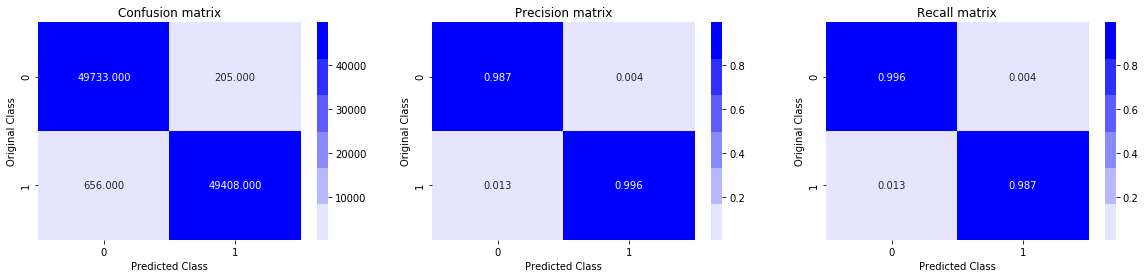

Test confusion_matrix


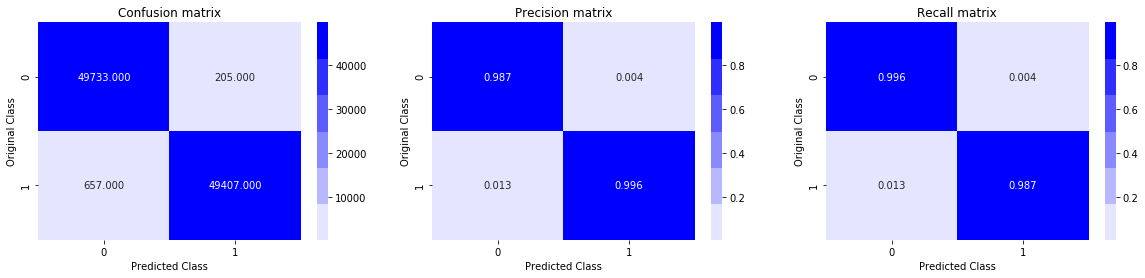

In [19]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

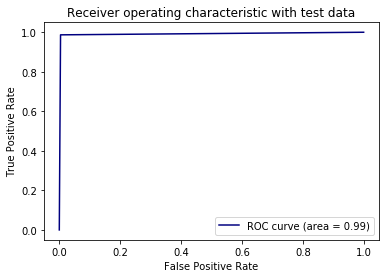

In [20]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

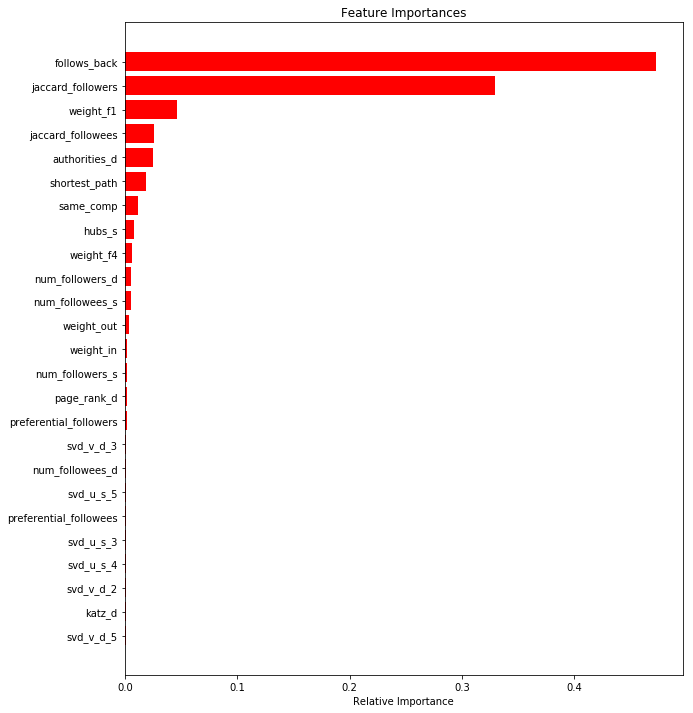

In [21]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()